# Decision trees

Decision trees are also a versatile Machine Learning that can perform both classification and regression tasks and event multiple output tasks.

Decision trees are also the fundamental components of Random Forests. 

In [1]:
# Common imports
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# to make this notebook's output stable across runs
np.random.seed(42)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
#Example of decision tree
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

In [3]:
iris = load_iris()
X = iris.data[:,2:] #Petal length and with
y = iris.target

In [4]:
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [5]:
from graphviz import Source
from sklearn.tree import export_graphviz

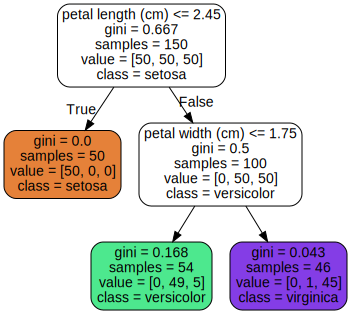

In [6]:
export_graphviz(
    tree_clf,
    out_file=os.path.join(IMAGES_PATH,"iris_tree.dot"),
    feature_names = iris.feature_names[2:],
    class_names = iris.target_names,
    rounded=True,
    filled=True
)
Source.from_file(os.path.join(IMAGES_PATH,"iris_tree.dot"))

If we look at the image above we can see from a sample or instance where we get information regarding the petal length <= 2.45 if True we give it the class "setosa".

If False then we go down another level and if it meets that condition then you get versicolor if not then virginica. 

As we can see we are going through a decision tree.  The parameter "max_depth" controls how deep in the tree we go. 

#### Deeper explanation

You start at the *root node* which is the first white box in the example above. It is at 0 depth. It asks if the petal length i sless than 2.45 cm. If yes then you move down the root's left child node or the orange box. It is a leaf node because it does not have any child nodes or simply it does not ask any questions. 

You can move 1 step right so the node asks another question at it's leaf node. If it meets any conditions then it will be one class of flower. 

*Dcision trees often require very little data prep such as avoiding feature scaling*. 

If we look at the information in the white box it says how many samples meet that condition. So the top box says 150 samples had that condition. When we go down we see in the orange box only 50 met that condition and in the right white box there were 100 samples that met that condition. 

The *gini* attribute measures impurity a node is pure if gini is equal to 0 (gini = 0). That is if all training instances applies to the blong to the same class. For example the orange box is gini 0 because all samples  belong to that class. Thus it is more pure. 

*Sklearn uses the CART algorithm which produces binary outputs, meaning it always asks two questions yes or no*



In [7]:
from matplotlib.colors import ListedColormap

Saving figure decision_tree_decision_boundaries_plot


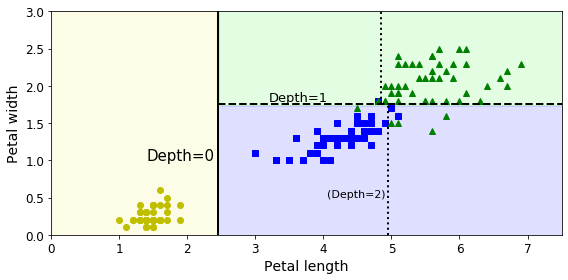

In [8]:
def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

save_fig("decision_tree_decision_boundaries_plot")
plt.show()

What we see above in the left box with the yellow is dots is a thick vertical line separating the other two boxes. The left of the black vertical line means the decision boundary for the root node at depth 0. That all petal lengths must be under 2.45  This means everything in depth 0 is *Pure* it cannot be split any further. 

The other ones are *impure* we can see there is a horiztonal dash line spliting by petal width. And we have two smaller veritical lines at depth 2 breaking the sets. 

The above shows how are using two features *petal length* and *petal width* to split the datasets. 

You can see with decision trees the probability that a instance belongs to a class. 

In [9]:
#Predicting probability
tree_clf.predict_proba([[5,1.5]])

array([[0.        , 0.90740741, 0.09259259]])

The above show the different classes "Iris setosa", "Iris versicolor" and "Iris virginica". We can see that there is a 90.7% probability that the class belongs to "Iris versicolor".

#### The CART trainig algorithm

The algorithm works by splitting the training set into two subsets using a single feature *k* and a threshold called *tk*. (e.g., "petal length <= 2.45cm")

The algorithm seaches for the pair of (*k and tk*) that produces the purest subsets.  

COST FUNCTION FORMULA BELOW:

<img src="images/CART.png"></img>

Once the algorithm splits the training set in two it splits the subsets using the same logic until it goes on and goes on. It will continue until it cannot split without reducing impurity or it raches the maximum depth as set the the max_depth parameter. 

There are different ways of doing early stopping using some descision tree parameters:

* min_samples_split
* min_samples_leaf
* min_weight_fraction_leaf
* max_leaf_nodes

CART algorithm is a greddy algorithm that means it is not meant to find the optimum but a pretty good solution.

The computational Complexity is O(log2(m)) so the predictions are quite fast. If you do use all features than you are doing O(n x m log2(mm)). 

For small datasets you can speed up the training using the parameter sort=True but this is not recommended for larger datasets. 

#### Using GINI vs Entropy

Gini impurity is often faster than entropy but entrophy tends to produced slightly more balanced trees. Though generally it does not make such a big impact. 

#### Regulizartion Hyperparameters and dealing with overfitting.

Decision Trees are pretty good at fitting the data, if you do not place some constraints it will be a nonparametric model because it does not have any parameters. This could lead to overfitting. 

A parametric model has a pretermined number of parameters so the riks of freedom is limited and this reduces overfitting but increases underfitting. 

Saving figure min_samples_leaf_plot


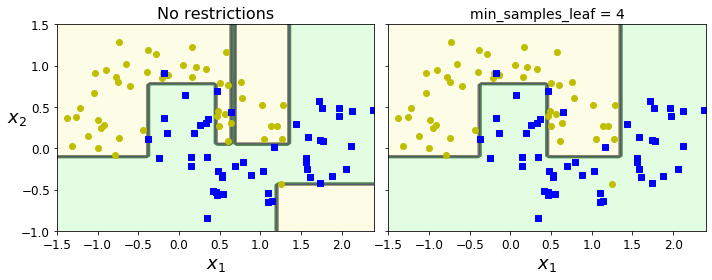

In [10]:
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("No restrictions", fontsize=16)
plt.sca(axes[1])
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)
plt.ylabel("")

save_fig("min_samples_leaf_plot")
plt.show()

We can see on the left hte modle with no training has done some overfitting but the one the right which has a restriction of freedom min_samples_leaf = 4 

## Regression with Decision Trees

Decision trees are also capable of doing regressions tasks. 

In [11]:
# Quadratic training set + noise
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

In [12]:
from sklearn.tree import DecisionTreeRegressor

In [13]:
tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X,y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

Saving figure tree_regression_plot


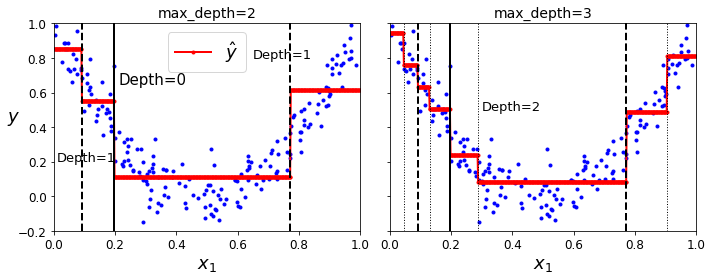

In [14]:
tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_regression_predictions(tree_reg1, X, y)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

plt.sca(axes[1])
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "Depth=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)

save_fig("tree_regression_plot")
plt.show()

In [15]:
export_graphviz(
    tree_reg1,
    out_file=os.path.join(IMAGES_PATH,"regression_tree.dot"),
    feature_names=["x1"],
    rounded=True,
    filled=True
)

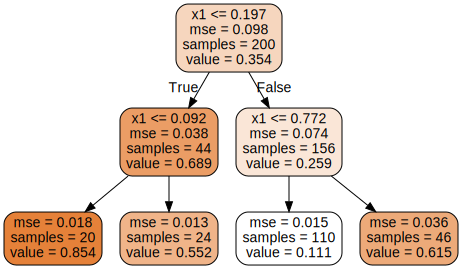

In [16]:
Source.from_file(os.path.join(IMAGES_PATH, "regression_tree.dot"))

The main difference between the is that instead of predicting a class it predicts a value. For example if you have a instance x1 = 0.6 you traverse through the tree until you reach the value 0.111. It also has a mean square error of 0.015. 

The prediction always picks the region in a way that makes most trianing instances as close as possible to that predicated value. 

The CART algorihm works the same way except rather than trying to minimize impurity it tries to reduce the MSE. 

*DECISION TREES ARE VERY SENSITIVE TO SMALL VARIATIONS IN THE TRAINING DATA.* For example if you remove 1 wide value or outlier you may get a very different model. 

This is where random forests might perform better. 

# Excercises

1. What is the approximate depth of a Decision Tree trained (without restrictions) on a training set with one million instances?

The length of a tree with M leaves is equal to log2(m)^2

***

2. Is a node's Gini impurity generally lower or greater than its parent's? Is it generally lower/greater, or always lower/greater.

It is generally lower, this is beacause the CART algorithmn's cost fu nction which splits the node each time to lower the impurity. 

***

3. If a Decision Tree is overfitting the training set, is it a good idea to try decreasing the max_depth?

Yes, you should increase the max_depth. 

***

4. If a decsion Tree is underfitting the training set is it a good idea to try scaling input features?

No, because a decisin tree does not care about scaled features. If you do want to fix underfitting you might want to increase the complexity of the model. 

***

5. If it takes one hour to train a Decision Tree on a training set containing 1 million instances, roughly how much time will it take to train another Decision Tree on a training set containing 10 miilion features?

O(n x m log(m)) is hte computational complexity so if you multiply by 10 you may get a much longer time. Formula in the book. 

*** 

6. If your training set contains 100,000 instances, will setting presort-True speed up training?

Yes but it depends on the power of your machine to handle complex tasks. But generally it should be for a few thousand instances. 



### 7.

Train and fine-tune a Decision Tree for the moons dataset by following these steps:

a.) Use make_moons(n_samples=10000, noise=0.4)  to generate a moons dataset.
<br></br>
b.) Use a  train_test_split() to split the dataset into a training set and a test set. 
<br></br>
c.) USe a grid search with cross validation (with the help of the GridSearchCV class) to find a good hyperparameter values for a DecisionTreeClassifier. (Hint: use try various values for max_leaf_nodes)
<br></br>
d.) Train it on the full training set using hyperparameters and measure your model's performance. You should get roughly 85% to 87% accuracy. 

In [17]:
from sklearn.datasets import make_moons

In [18]:
X, y = make_moons(n_samples=10000, noise=0.4, random_state=42)

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42)

In [21]:
from sklearn.model_selection import GridSearchCV

In [22]:
params = {"max_leaf_nodes":list(range(2,500)),"min_samples_split":list(range(2,10)),"max_depth":list(range(2,10))}

tree_grid = GridSearchCV(DecisionTreeClassifier(random_state=42),params,verbose=1,cv=3)
tree_grid.fit(X_train,y_train)

Fitting 3 folds for each of 31872 candidates, totalling 95616 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 95616 out of 95616 | elapsed: 13.0min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
                

In [23]:
tree_grid.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=9, max_features=None, max_leaf_nodes=47,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [24]:
from sklearn.metrics import accuracy_score

y_pred = tree_grid.predict(X_test)
accuracy_score(y_test, y_pred)

0.8605

# 8

Grow a forest by following these steps:

A.) Continuing the previous excercise, generate 1,000 subsets of the training set, each containing 100 instances selected randomly. Hint: you can use Scikit Learn's ShuffleSplit class for this.

B.) Train one Decision Tree on each subset,  using the best hyperparameter values found in the previous exercise. Evaluate these 1,000 Decision Trees on the test set. Since they were trained on smaller sets, these Decision trees will likely perform worse than the first Decision Tree, achieving only about 80% accuarcy.

C.) Now comes the magic for each test set intance generate the predictions of 1,000 Decision Trees and keep only the most frequent prediction (you can use SciPy's mode). This approach gives you majority-vote predictions over the test set.

D.) Evaluate these predictions on the test set: you should obtain a slightly h igher accuracy than your first model. (about 0.5 to 1.5% higher). Congratulations, you have trained a Random Forest classifier!



In [25]:
from sklearn.model_selection import ShuffleSplit

In [26]:
training_subsets = 1000
instance_size = 100

In [28]:
shuffle_split = ShuffleSplit(n_splits=training_subsets,test_size=len(X_train) - instance_size, random_state=42)

In [31]:
print(shuffle_split)

ShuffleSplit(n_splits=1000, random_state=42, test_size=7900, train_size=None)


In [36]:
mini_sets = []

for train_index, test_index in shuffle_split.split(X_train):
    X_mini_train = X_train[train_index]
    y_mini_train = y_train[train_index]
    mini_sets.append((X_mini_train, y_mini_train))

In [37]:
from sklearn.base import clone

forest = [clone(tree_grid.best_estimator_) for _ in range(instance_size)]

accuracy_scores = []

for tree, (X_mini_train, y_mini_train) in zip(forest, mini_sets):
    tree.fit(X_mini_train, y_mini_train)
    
    y_pred = tree.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

np.mean(accuracy_scores)

0.8010150000000001

In [38]:
Y_pred = np.empty([instance_size, len(X_test)], dtype=np.uint8)

for tree_index, tree in enumerate(forest):
    Y_pred[tree_index] = tree.predict(X_test)

In [39]:
from scipy.stats import mode

In [40]:
y_pred_majority_votes, n_votes = mode(Y_pred, axis=0)

In [41]:
accuracy_score(y_test, y_pred_majority_votes.reshape([-1]))

0.873